<a href="https://colab.research.google.com/github/11ari11/Research-Article-Analyzer/blob/main/Dlhc_finalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instructions
# 1.  Fill in the Python code sections marked with `# --- FILL IN YOUR CODE HERE ---`.
# 2.  Please avoid changing the existing code structure, function names, or provided data loading/preprocessing steps unless explicitly asked.
# 3.  Ensure all cells run correctly and outputs are visible.
# 4.  Upload the final `.ipynb` file.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# Load the Q1 dataset
try:
    diabetes_df = pd.read_csv('diabetes.csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found.")
    exit()

# Separate features (X) and target (y)
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values.reshape(-1, 1)

# Split data
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler_q1 = StandardScaler()
X_train_q1_scaled = scaler_q1.fit_transform(X_train_q1)
X_test_q1_scaled = scaler_q1.transform(X_test_q1)

print("Q1 Dataset Shapes:")
print("X_train:", X_train_q1_scaled.shape)
print("y_train:", y_train_q1.shape)
print("X_test:", X_test_q1_scaled.shape)
print("y_test:", y_test_q1.shape)

Q1 Dataset Shapes:
X_train: (614, 8)
y_train: (614, 1)
X_test: (154, 8)
y_test: (154, 1)


Epoch 200/1000, Loss: 0.4685
Epoch 400/1000, Loss: 0.4664
Epoch 600/1000, Loss: 0.4662
Epoch 800/1000, Loss: 0.4662
Epoch 1000/1000, Loss: 0.4662

Logistic Regression (Scratch) Test Accuracy: 0.7143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



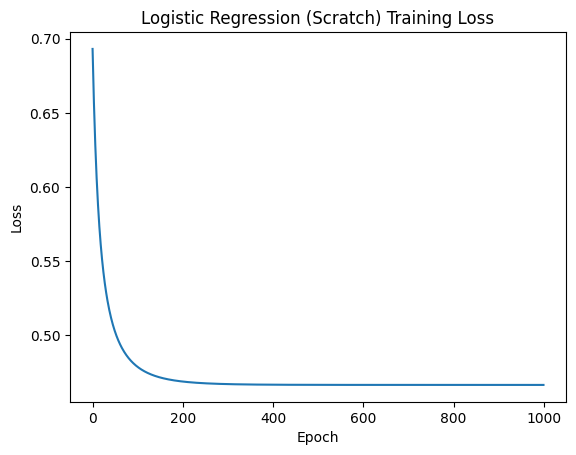

In [ ]:
# Q1 Part A: Logistic Regression (From Scratch)
def sigmoid(z):
    # --- FILL IN YOUR CODE HERE ---
    # Implement the sigmoid function
    p_z = 1 / ( 1+ np.exp(-z))
    return p_z
    # --- END CODE ---

def logistic_regression_scratch(X_train, y_train, X_test, learning_rate=0.1, num_epochs=1000):
    """
    Fits logistic regression from scratch and predicts on test data.
    Returns predictions and training losses.
    """
    num_samples_train, num_features = X_train.shape

    # Initialize weights and bias
    weights = np.zeros((num_features, 1))
    bias = 0
    losses = []
    epsilon = 1e-15 # For loss calculation stability

    # Training loop (Gradient Descent)
    for epoch in range(num_epochs):
        # --- FILL IN YOUR CODE HERE ---
        # 1. Calculate linear output (z = X*w + b)
        z = np.dot(X_train , weights) + bias

        # 2. Apply sigmoid activation
        y_pred = sigmoid(z)

        # 3. Calculate binary cross-entropy loss
        loss = -np.mean(y_train * np.log(y_pred + epsilon) + (1 - y_train) * np.log(1 - y_pred + epsilon))
        losses.append(loss)

        # 4. Calculate gradients (dw, db)
        dw = np.dot(X_train.T, (y_pred - y_train)) / num_samples_train
        db = np.sum(y_pred - y_train) / num_samples_train

        # 5. Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        # --- END CODE ---

        if (epoch + 1) % 200 == 0:
            # Calculate loss for printing (can reuse calculation from above)
            # loss = ...
             print(f'Epoch {epoch+1}/{num_epochs}, Loss: {losses[-1]:.4f}')
            #print(f'Epoch {epoch+1}/{num_epochs} completed.') # Placeholder print

    # Prediction on test set
    # --- FILL IN YOUR CODE HERE ---
    # 1. Calculate linear output for test set
    z_test = np.dot(X_test, weights) + bias
    # 2. Apply sigmoid
    y_pred_test_prob = sigmoid(z_test)
    # 3. Threshold probabilities to get predictions (0 or 1)
    y_pred = (y_pred_test_prob >= 0.5).astype(int)

    # --- END CODE ---

    # Ensure y_pred is returned correctly
    if y_pred is None:
       print("Warning: y_pred not assigned in logistic_regression_scratch")
       # Assign a default shape or value if necessary for plotting/evaluation
       y_pred = np.zeros_like(y_test_q1) # Example default

    return y_pred, losses

# %%
# Train and predict using the scratch logistic regression function
y_pred_log_reg, losses_log_reg = logistic_regression_scratch(
    X_train_q1_scaled, y_train_q1, X_test_q1_scaled,
    learning_rate=0.1, num_epochs=1000
)

# Evaluate
accuracy_log_reg = accuracy_score(y_test_q1, y_pred_log_reg)
print(f"\nLogistic Regression (Scratch) Test Accuracy: {accuracy_log_reg:.4f}")
print(classification_report(y_test_q1, y_pred_log_reg))

# Plot loss
plt.figure()
if losses_log_reg: # Check if losses list is not empty
    plt.plot(losses_log_reg)
    plt.title('Logistic Regression (Scratch) Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
else:
    plt.title('Logistic Regression (Scratch) Training Loss (No data)')
plt.show()

Epoch 200/2000, Loss: 0.6233
Epoch 400/2000, Loss: 0.5531
Epoch 600/2000, Loss: 0.5001
Epoch 800/2000, Loss: 0.4779
Epoch 1000/2000, Loss: 0.4691
Epoch 1200/2000, Loss: 0.4655
Epoch 1400/2000, Loss: 0.4638
Epoch 1600/2000, Loss: 0.4630
Epoch 1800/2000, Loss: 0.4626
Epoch 2000/2000, Loss: 0.4622

Neural Network (Scratch) Test Accuracy: 0.7143
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.60      0.57      0.58        54

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



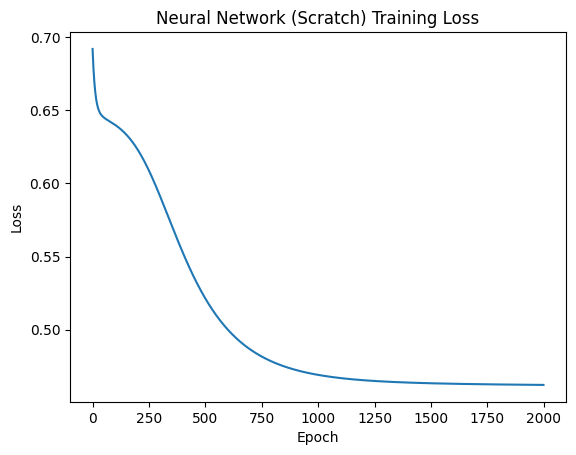

In [ ]:
# Q1 Part B: Feed-Forward Neural Network (From Scratch)
# Architecture: Input(8) -> Hidden(3) -> Output(1)

def sigmoid_derivative(s):
    # --- FILL IN YOUR CODE HERE ---
    # Implement the derivative of the sigmoid function
    p_sd = s*(1-s)
    return p_sd
    # --- END CODE ---

def ffnn_scratch(X_train, y_train, X_test, input_size, hidden_size, output_size, learning_rate=0.1, num_epochs=2000):
    """
    Fits a simple FFNN from scratch and predicts on test data.
    Returns predictions and training losses.
    """
    num_samples_train = X_train.shape[0]

    # Initialize weights and biases
    # --- FILL IN YOUR CODE HERE ---
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    pass # Remove this line and add your code
    # --- END CODE ---

    # Check if weights are initialized before proceeding
    if W1 is None or W2 is None:
        print("Error: Weights not initialized in ffnn_scratch.")
        # Return default values to avoid crashing later code
        return np.zeros_like(y_test_q1), []


    losses = []
    epsilon = 1e-15 # For loss calculation

    # Training loop
    for epoch in range(num_epochs):
        # --- FILL IN YOUR CODE HERE ---
        # == Forward Pass ==
        # Layer 1 (Hidden): Calculate z1, a1
        z1 = np.dot(X_train, W1) + b1
        a1 = sigmoid(z1)
        # Layer 2 (Output): Calculate z2, a2 (predicted probability)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        # == Loss Calculation == (Binary Cross-Entropy)
        loss = -np.mean(y_train * np.log(a2 + epsilon) + (1 - y_train) * np.log(1 - a2 + epsilon))
        losses.append(loss)
        # == Backward Pass ==
        # Calculate delta2 (Error at output layer)
        delta2 = a2 - y_train.reshape(-1, 1)
        # Calculate dW2, db2 (Gradients for output layer)
        dW2 = np.dot(a1.T, delta2) / num_samples_train
        db2 = np.sum(delta2, axis=0, keepdims=True) / num_samples_train
        # Calculate delta1 (Error at hidden layer)
        delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)
        # Calculate dW1, db1 (Gradients for hidden layer)
        dW1 = np.dot(X_train.T, delta1) / num_samples_train
        db1 = np.sum(delta1, axis=0, keepdims=True) / num_samples_train

        # == Update Weights and Biases ==
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        # --- END CODE ---

        if (epoch + 1) % 200 == 0:
             # Calculate loss for printing (can reuse calculation from above)
             # loss = ...
             print(f'Epoch {epoch+1}/{num_epochs}, Loss: {losses[-1]:.4f}')
             #print(f'Epoch {epoch+1}/{num_epochs} completed.') # Placeholder print

    # Prediction on test set
    # --- FILL IN YOUR CODE HERE ---
    # Perform forward pass on X_test to get probabilities (a2_test)
    z1_test = np.dot(X_test, W1) + b1
    a1_test = sigmoid(z1_test)
    z2_test = np.dot(a1_test, W2) + b2
    a2_test = sigmoid(z2_test)

    # Threshold probabilities to get predictions (0 or 1)
    y_pred = (a2_test >= 0.5).astype(int)
    # --- END CODE ---

    # Ensure y_pred is returned correctly
    if y_pred is None:
       print("Warning: y_pred not assigned in ffnn_scratch")
       y_pred = np.zeros_like(y_test_q1) # Example default

    return y_pred, losses

# Define network dimensions
input_dim_q1 = X_train_q1_scaled.shape[1]
hidden_dim_q1 = 3
output_dim_q1 = 1

# Train and predict using the scratch FFNN function
y_pred_nn, losses_nn = ffnn_scratch(
    X_train_q1_scaled, y_train_q1, X_test_q1_scaled,
    input_size=input_dim_q1, hidden_size=hidden_dim_q1, output_size=output_dim_q1,
    learning_rate= 0.1, num_epochs=2000 # Adjust hyperparameters as needed
)

# Evaluate
accuracy_nn = accuracy_score(y_test_q1, y_pred_nn)
print(f"\nNeural Network (Scratch) Test Accuracy: {accuracy_nn:.4f}")
print(classification_report(y_test_q1, y_pred_nn))

# Plot loss
plt.figure()
if losses_nn: # Check if losses list is not empty
    plt.plot(losses_nn)
    plt.title('Neural Network (Scratch) Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
else:
    plt.title('Neural Network (Scratch) Training Loss (No data)')
plt.show()


In [ ]:
# Load the Q2 Dataset
# Requires `pip install medmnist`
%pip install medmnist

try:
    import medmnist
    from medmnist import PneumoniaMNIST
    dataset_loaded_q2 = True

    # Download and load
    data_flag = 'pneumoniamnist'
    info = medmnist.INFO[data_flag]
    DataClass = getattr(medmnist, info['python_class'])
    train_dataset = DataClass(split='train', download=True)
    val_dataset = DataClass(split='val', download=True)
    test_dataset = DataClass(split='test', download=True)

    # Get data into numpy arrays
    X_train_q2, y_train_q2 = train_dataset.imgs, train_dataset.labels
    X_val_q2, y_val_q2 = val_dataset.imgs, val_dataset.labels
    X_test_q2, y_test_q2 = test_dataset.imgs, test_dataset.labels

    # Preprocess
    img_rows, img_cols = X_train_q2.shape[1], X_train_q2.shape[2]
    n_channels = info['n_channels']
    input_shape_q2 = (img_rows, img_cols, n_channels)
    num_classes_q2 = 1 # Binary classification

    X_train_q2 = X_train_q2.reshape(X_train_q2.shape[0], img_rows, img_cols, n_channels).astype('float32') / 255.0
    X_val_q2 = X_val_q2.reshape(X_val_q2.shape[0], img_rows, img_cols, n_channels).astype('float32') / 255.0
    X_test_q2 = X_test_q2.reshape(X_test_q2.shape[0], img_rows, img_cols, n_channels).astype('float32') / 255.0

    y_train_q2 = y_train_q2.astype('float32')
    y_val_q2 = y_val_q2.astype('float32')
    y_test_q2 = y_test_q2.astype('float32')

    print("Q2 Dataset Shapes Ready.")
    print("Input shape:", input_shape_q2)

except ImportError:
    print("Error: 'medmnist' library not found. Please install it.")
    dataset_loaded_q2 = False

100%|██████████| 4.17M/4.17M [00:00<00:00, 4.95MB/s]


Q2 Dataset Shapes Ready.
Input shape: (28, 28, 1)


Model: "FFNN_Pneumonia"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)


Training FFNN Model...
Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6794 - loss: 0.6071 - val_accuracy: 0.8664 - val_loss: 0.3764
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8806 - loss: 0.3322 - val_accuracy: 0.9218 - val_loss: 0.2599
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9050 - loss: 0.2422 - val_accuracy: 0.9294 - val_loss: 0.2124
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9192 - loss: 0.2082 - val_accuracy: 0.9427 - val_loss: 0.1865
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9235 - loss: 0.1899 - val_accuracy: 0.9485 - val_loss: 0.1708
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9299 - loss: 0.1781 - val_accuracy: 0.9485 - val_loss: 0.1604
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9327 - loss: 0.1697 - val_accuracy: 0.9542 - val_loss: 0.1530
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9332 - loss: 0.1634 - 

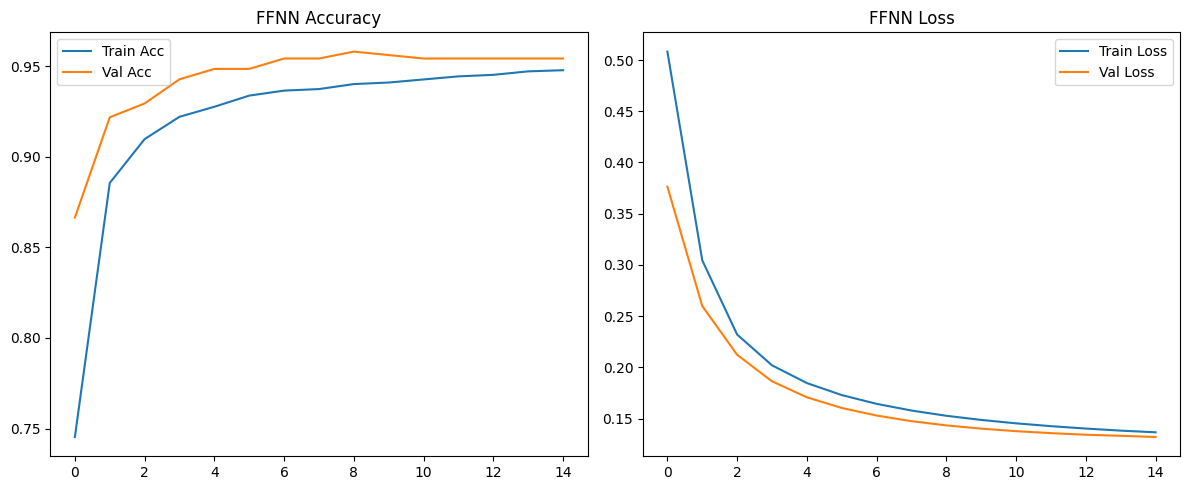

In [ ]:
# Q2 Part A: Feed-Forward Neural Network (Using TensorFlow/Keras)

if dataset_loaded_q2:
    # Build FFNN model directly
    ffnn_model = keras.Sequential(name="FFNN_Pneumonia")
    # --- FILL IN YOUR CODE HERE ---
    # Define the FFNN architecture using Keras layers
    ffnn_model.add(keras.Input(shape=X_train_q2.shape[1:]))
    # 1. Flatten input
    ffnn_model.add(layers.Flatten())
    # 2. Dense hidden layer(s) (e.g., 128 neurons, ReLU)
    ffnn_model.add(layers.Dense(128, activation='relu'))
    # 3. Output layer (1 neuron, sigmoid for binary classification)
    ffnn_model.add(layers.Dense(1, activation='sigmoid'))

    # --- END CODE ---

    ffnn_model.summary() # Will error if model is empty

    # Compile
    # --- FILL IN YOUR CODE HERE ---
    ffnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # --- END CODE ---

    # Train
    batch_size = 128
    epochs = 15
    print("\nTraining FFNN Model...")
    # --- FILL IN YOUR CODE HERE ---
    history_ffnn = ffnn_model.fit(
            X_train_q2, y_train_q2,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val_q2, y_val_q2),
            verbose=1
    )

    # --- END CODE ---

    # Evaluate
    print("\nEvaluating FFNN Model...")
    # --- FILL IN YOUR CODE HERE ---
    score_ffnn = ffnn_model.evaluate(X_test_q2, y_test_q2, verbose=0)
    print(f"FFNN Test Loss: {score_ffnn[0]:.4f}")
    print(f"FFNN Test Accuracy: {score_ffnn[1]:.4f}")
    # --- END CODE ---

    # Plot history
    if history_ffnn: # Check if training was run
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1); plt.plot(history_ffnn.history['accuracy'], label='Train Acc'); plt.plot(history_ffnn.history['val_accuracy'], label='Val Acc'); plt.title('FFNN Accuracy'); plt.legend()
        plt.subplot(1, 2, 2); plt.plot(history_ffnn.history['loss'], label='Train Loss'); plt.plot(history_ffnn.history['val_loss'], label='Val Loss'); plt.title('FFNN Loss'); plt.legend()
        plt.tight_layout(); plt.show()
    else:
        print("FFNN training history not available for plotting.")

else:
    print("\nSkipping Q2 Part A (Dataset not loaded).")


Model: "CNN_Pneumonia"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 420,481 (1.60 MB)

 Trainable params: 420,481 (1.60 MB)

 Non-trainable params: 0 (0.00 B)


Training CNN Model...
Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.6814 - loss: 0.5842 - val_accuracy: 0.8511 - val_loss: 0.4101
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.8656 - loss: 0.3300 - val_accuracy: 0.9160 - val_loss: 0.2320
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.9240 - loss: 0.2024 - val_accuracy: 0.9504 - val_loss: 0.1648
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.9368 - loss: 0.1622 - val_accuracy: 0.9427 - val_loss: 0.1646
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.9427 - loss: 0.1494 - val_accuracy: 0.9618 - val_loss: 0.1229
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9492 - loss: 0.1289 - val_accuracy: 0.9580 - val_loss: 0.1161
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9530 - loss: 0.1201 - val_accuracy: 0.9542 - val_loss: 0.1110
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - accuracy: 0.9561 - loss: 

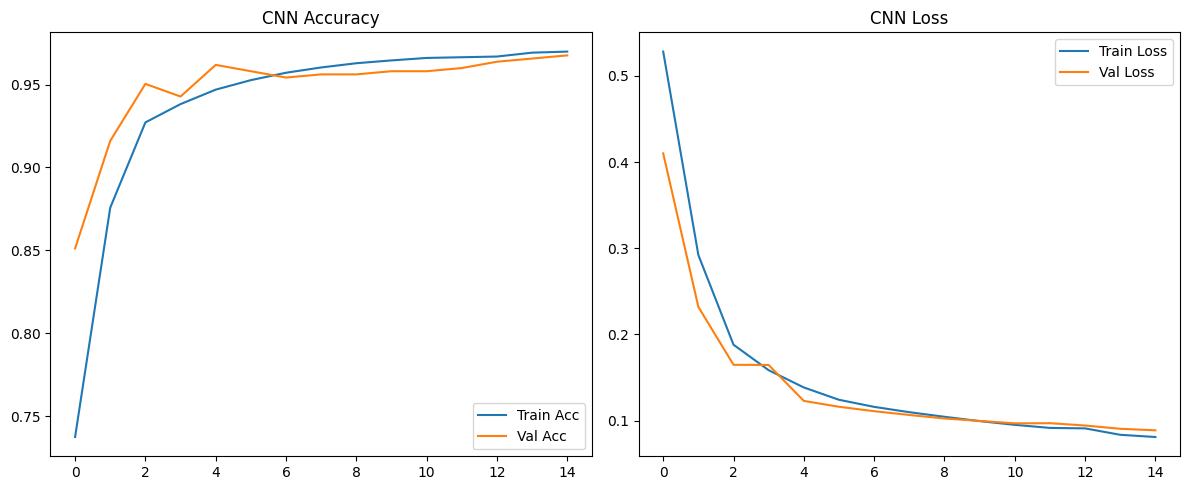


--- Performance Comparison ---
FFNN Test Accuracy: 0.8381
CNN Test Accuracy:  0.8349


In [ ]:
# Q2 Part B: Convolutional Neural Network (Using TensorFlow/Keras)

if dataset_loaded_q2:
    # Build CNN model directly
    cnn_model = keras.Sequential(name="CNN_Pneumonia")
    # --- FILL IN YOUR CODE HERE ---
    cnn_model.add(keras.Input(shape=X_train_q2.shape[1:]))
    # Define the CNN architecture using Keras layers
    # 1. Conv2D + MaxPooling2D layers
     # Conv Block 1
    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    # Conv Block 2
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    cnn_model.add(layers.MaxPooling2D((2, 2)))
    # 2. Flatten
    cnn_model.add(layers.Flatten())
    # 3. Dense layer(s)
    cnn_model.add(layers.Dense(128, activation='relu'))

    # 4. Output layer (1 neuron, sigmoid)
    cnn_model.add(layers.Dense(1, activation='sigmoid'))
    # --- END CODE ---

    cnn_model.summary() # Will error if model is empty

    # Compile
    # --- FILL IN YOUR CODE HERE ---
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # --- END CODE ---

    # Train
    batch_size = 128
    epochs = 15
    print("\nTraining CNN Model...")
    # --- FILL IN YOUR CODE HERE ---
    # history_cnn = cnn_model.fit(...)
    history_cnn = cnn_model.fit(
        X_train_q2, y_train_q2,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val_q2, y_val_q2),
        verbose=1
    )
    # --- END CODE ---

    # Evaluate
    print("\nEvaluating CNN Model...")
    # --- FILL IN YOUR CODE HERE ---
    # score_cnn = cnn_model.evaluate(...)
    score_cnn = cnn_model.evaluate(X_test_q2, y_test_q2, verbose=0)
    print(f"CNN Test Loss: {score_cnn[0]:.4f}")
    print(f"CNN Test Accuracy: {score_cnn[1]:.4f}")

    # --- END CODE ---

    # Plot history
    if history_cnn: # Check if training was run
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1); plt.plot(history_cnn.history['accuracy'], label='Train Acc'); plt.plot(history_cnn.history['val_accuracy'], label='Val Acc'); plt.title('CNN Accuracy'); plt.legend()
        plt.subplot(1, 2, 2); plt.plot(history_cnn.history['loss'], label='Train Loss'); plt.plot(history_cnn.history['val_loss'], label='Val Loss'); plt.title('CNN Loss'); plt.legend()
        plt.tight_layout(); plt.show()
    else:
        print("CNN training history not available for plotting.")

    # Compare performance
    print("\n--- Performance Comparison ---")
    if 'score_ffnn' in locals() and score_ffnn[1] != 0.0: # Check if FFNN was evaluated
         print(f"FFNN Test Accuracy: {score_ffnn[1]:.4f}")
    if 'score_cnn' in locals() and score_cnn[1] != 0.0: # Check if CNN was evaluated
        print(f"CNN Test Accuracy:  {score_cnn[1]:.4f}")

else:
    print("\nSkipping Q2 Part B (Dataset not loaded).")